In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing
import string #special operations on strings
import spacy  #language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/Elon_musk.csv',encoding='latin-1')

In [ ]:
data.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [ ]:
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


**Text Preprocessing**

In [ ]:
#Removing both the leading & Trailing Characters
data=[Text.strip() for Text in data.Text]

In [ ]:
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
#Removing empty strings coz they are considerd false in python
data=[Text for Text in data if Text]

In [ ]:
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [ ]:
#Joining the list into one string/text
data_text=''.join(data)
data_text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [ ]:
import nltk

#Removing twitter username handles from the text
from nltk.tokenize import TweetTokenizer
toknzr=TweetTokenizer(strip_handles=True)
toknzr

In [ ]:
data_tokens=toknzr.tokenize(data_text)
print(data_tokens)

['I', '\x92', 'm', 'an', 'alien', '@ID_AA_Carmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', '@gtera27', 'Doge', 'is', 'underestimated', '@teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2ojFrodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM@OwenSparks_', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation.The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', '@GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'to', 'do', 'Clubhouse', 'with', ':/', '/', 't.co/3rWE9uHSTS@geoffkeighley', 'It', '\x92', 's', 'getting', 'realBo

In [ ]:
#Again joining list into one string
data_tokens_text=' '.join(data_tokens)
data_tokens_text

'I \x92 m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2ojFrodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM@OwenSparks_ Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely @GiveDirectly Just sent someJust agree to do Clubhouse with :/ / t.co/3rWE9uHSTS@geoffkeighley It \x92 s getting realBought some Dogecoin for lil X , so he can be a toddler hodler @JoshManMode He definitely has issues , but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O@freewalletorg Any crypto w

In [ ]:
#Remove Punctuations
no_punc=data_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2ojFrodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrMOwenSparks Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet that won \x92 t give you your private keys should be

In [ ]:
#Removing http or url from the text
import re
no_url=re.sub(r'http/S+','',no_punc)
no_url

'I \x92 m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2ojFrodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrMOwenSparks Haha thanks  Indeed  Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likely GiveDirectly Just sent someJust agree to do Clubhouse with   tco3rWE9uHSTSgeoffkeighley It \x92 s getting realBought some Dogecoin for lil X  so he can be a toddler hodler JoshManMode He definitely has issues  but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wallet that won \x92 t give you your private keys should be

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url)
text_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['I',
 '\x92',
 'm',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'tracing',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'is',
 'nextlevel',
 'Have',
 'you',
 'tried',
 'it',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'is',
 'underestimated',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amazing',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2ojFrodo',
 'was',
 'the',
 'underdoge',
 'All',
 'thought',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrMOwenSparks',
 'Haha',
 'thanks',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocationThe',
 'most',
 'entertaining',
 'outcome',
 'is',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'sent',
 'someJust',
 'agree',
 'to',
 'do',
 'Clubhouse',
 'with',
 'tco3rWE9uHSTSgeoffkeighley',
 'It',
 '\x92',
 's',
 'getting',
 'realBough

In [ ]:
nltk.download ('stopwords')

#length count
len(text_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


18909

In [ ]:
#Remove Stopwords
from nltk.corpus import stopwords
my_stopwords=stopwords.words('english')
sw_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stopwords.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stopwords]
print(no_stop_tokens)

['alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrMOwenSparks', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocationThe', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'someJust', 'agree', 'Clubhouse', 'tco3rWE9uHSTSgeoffkeighley', 'It', 'getting', 'realBought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'This', 'true', 'power', 'httpstcoFc9uhQSd7Ofreewalletorg', 'Any', 'crypto', 'wallet', 'give', 

In [ ]:
len(no_stop_tokens)

12564

In [ ]:
#Normalize data
lower_words=[Text.lower() for Text in no_stop_tokens]

In [ ]:
print(lower_words[300:400])

['second', 'last', 'kingdom', 'httpstcoje4ei88hmvdumdin7', 'haven', 'heard', 'name', 'years', 'grimezsz', 'dogecakeyolt', 'httpstcocnof9yjpf1kristennetten', 'that', 'damian', 'kristennetten', 'yeah', 'owensparks', 'surethe', 'great', 'thing', 'restaurants', 'get', 'hang', 'strangers', 'sjmthe', 'future', 'currency', 'earth', 'redlineshifter', 'just', 'scratchmuch', 'wow', 'rationaletienne', 'u0001f5a4', 'destiny', 'renatakonkoly', 'franz', 'essential', 'erdayastronaut', 'that', 'said', 'ship', 'landing', 'burn', 'clear', 'solution', 'my', 'greate', 'httpstcoe5wikiugkzadamklotz', 'will', 'still', 'use', 'hot', 'gas', 'maneuvering', 'rcs', 'thrusters', 'httpstcovso9h4ioederdayastronaut', 'higher', 'isp', 'erdayastronaut', 'intuitively', 'would', 'seem', 'turbopumpfed', 'raptors', 'mu', 'httpstcolbtg1sibucbrendan2908', 'yesrt', 'falcon', '9', 'launch', 'spherex', 'mission', '\x96', 'collect', 'data', '300', 'million', 'galaxies', 'explore', 'unrt', 'falcon', '9', 'launches', '60', 'starli

In [ ]:
#Most common words
from nltk.probability import FreqDist
freq=FreqDist(no_stop_tokens)
freq.most_common(20)

[('Tesla', 94),
 ('We', 79),
 ('It', 72),
 ('The', 67),
 ('This', 55),
 ('great', 46),
 ('launch', 42),
 ('Erdayastronaut', 41),
 ('Yeah', 40),
 ('SpaceX', 39),
 ('would', 38),
 ('like', 38),
 ('PPathole', 37),
 ('flcnhvy', 37),
 ('That', 36),
 ('Dragon', 36),
 ('first', 34),
 ('make', 32),
 ('much', 32),
 ('need', 30)]

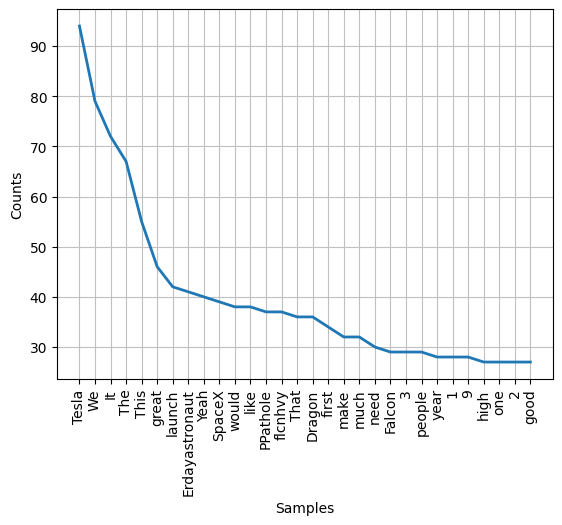

In [ ]:
freq.plot(30,cumulative=False)
plt.show()

**Stemming**

In [ ]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[300:400])

['second', 'last', 'kingdom', 'httpstcoje4ei88hmvdumdin7', 'haven', 'heard', 'name', 'year', 'grimezsz', 'dogecakeyolt', 'httpstcocnof9yjpf1kristennetten', 'that', 'damian', 'kristennetten', 'yeah', 'owenspark', 'sureth', 'great', 'thing', 'restaur', 'get', 'hang', 'stranger', 'sjmthe', 'futur', 'currenc', 'earth', 'redlineshift', 'just', 'scratchmuch', 'wow', 'rationaletienn', 'u0001f5a4', 'destini', 'renatakonkoli', 'franz', 'essenti', 'erdayastronaut', 'that', 'said', 'ship', 'land', 'burn', 'clear', 'solut', 'my', 'great', 'httpstcoe5wikiugkzadamklotz', 'will', 'still', 'use', 'hot', 'ga', 'maneuv', 'rc', 'thruster', 'httpstcovso9h4ioederdayastronaut', 'higher', 'isp', 'erdayastronaut', 'intuit', 'would', 'seem', 'turbopumpf', 'raptor', 'mu', 'httpstcolbtg1sibucbrendan2908', 'yesrt', 'falcon', '9', 'launch', 'spherex', 'mission', '\x96', 'collect', 'data', '300', 'million', 'galaxi', 'explor', 'unrt', 'falcon', '9', 'launch', '60', 'starlink', 'satellit', 'orbit', '\x96', 'mission'

**Lemmatization**

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2ojfrodo underdoge all thought would fail himself httpstcozgxjfdzzrmowensparks haha thanks indeed tweets definitely represent realworld time allocationthe entertaining outcome likely givedirectly just sent somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it getting realbought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy this true power httpstcofc9uhqsd7ofreewalletorg any crypto wallet give private keys avoided costs freewalletorg your app sucksrt nasa selected falcon heavy launch first two elements lunar gateway together one mission httpstco3pwtajtourville blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggering

In [ ]:
lemmas=[token.lemma_ for token in doc]

In [ ]:
lemmas

['alien',
 'idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'have',
 'try',
 'great',
 'interview',
 'gtera27',
 'doge',
 'underestimate',
 'teslacn',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'now',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'httpstco9wfkmyu2ojfrodo',
 'underdoge',
 'all',
 'thought',
 'would',
 'fail',
 'himself',
 'httpstcozgxjfdzzrmowenspark',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocationthe',
 'entertaining',
 'outcome',
 'likely',
 'givedirectly',
 'just',
 'send',
 'somejust',
 'agree',
 'clubhouse',
 'tco3rwe9uhstsgeoffkeighley',
 'it',
 'get',
 'realbought',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'joshmanmode',
 'he',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'freewalletorg',
 'thank',
 'fix',
 'freewalletorg',
 'please',
 'unlock',
 'account',
 'astrojordy',
 'this',
 'true',
 'power',
 'https

In [ ]:
clean_data=' '.join(lemmas)
len(clean_data)


98709

In [ ]:
clean_data

'alien idaacarmack ray trace cyberpunk hdr nextlevel have try great interview gtera27 doge underestimate teslacn congratulation tesla china amazing execution last year now next even happy new year ox httpstco9wfkmyu2ojfrodo underdoge all thought would fail himself httpstcozgxjfdzzrmowenspark haha thank indeed tweet definitely represent realworld time allocationthe entertaining outcome likely givedirectly just send somejust agree clubhouse tco3rwe9uhstsgeoffkeighley it get realbought dogecoin lil x toddler hodler joshmanmode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account astrojordy this true power httpstcofc9uhqsd7ofreewalletorg any crypto wallet give private key avoid cost freewalletorg your app sucksrt nasa select falcon heavy launch first two element lunar gateway together one mission httpstco3pwtajtourville blkmdl3 once predict cash flow reasonably well starlink ipo rationaletienne starlink staggeringly difficult technical ec

**Using CountVectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
datacv=cv.fit_transform(lemmas)
datacv

<12589x4578 sparse matrix of type '<class 'numpy.int64'>'
	with 12238 stored elements in Compressed Sparse Row format>

In [ ]:
print(cv.vocabulary_)

{'alien': 221, 'idaacarmack': 2277, 'ray': 3314, 'trace': 4119, 'cyberpunk': 865, 'hdr': 1541, 'nextlevel': 2890, 'have': 1535, 'try': 4159, 'great': 1470, 'interview': 2387, 'gtera27': 1486, 'doge': 1007, 'underestimate': 4294, 'teslacn': 3986, 'congratulation': 767, 'tesla': 3984, 'china': 666, 'amazing': 244, 'execution': 1199, 'last': 2518, 'year': 4543, 'now': 2925, 'next': 2889, 'even': 1171, 'happy': 1520, 'new': 2887, 'ox': 3039, 'httpstco9wfkmyu2ojfrodo': 1725, 'underdoge': 4293, 'all': 224, 'thought': 4048, 'would': 4526, 'fail': 1233, 'himself': 1584, 'httpstcozgxjfdzzrmowenspark': 2239, 'haha': 1498, 'thank': 4011, 'indeed': 2324, 'tweet': 4174, 'definitely': 915, 'represent': 3389, 'realworld': 3335, 'time': 4066, 'allocationthe': 227, 'entertaining': 1135, 'outcome': 3015, 'likely': 2574, 'givedirectly': 1438, 'just': 2456, 'send': 3558, 'somejust': 3704, 'agree': 198, 'clubhouse': 699, 'tco3rwe9uhstsgeoffkeighley': 3942, 'it': 2408, 'get': 1423, 'realbought': 3327, 'doge

In [ ]:
print(datacv.toarray()[200:300])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(datacv.toarray().shape)

(12589, 4578)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [ ]:

print(tfidf_matix_ngram.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


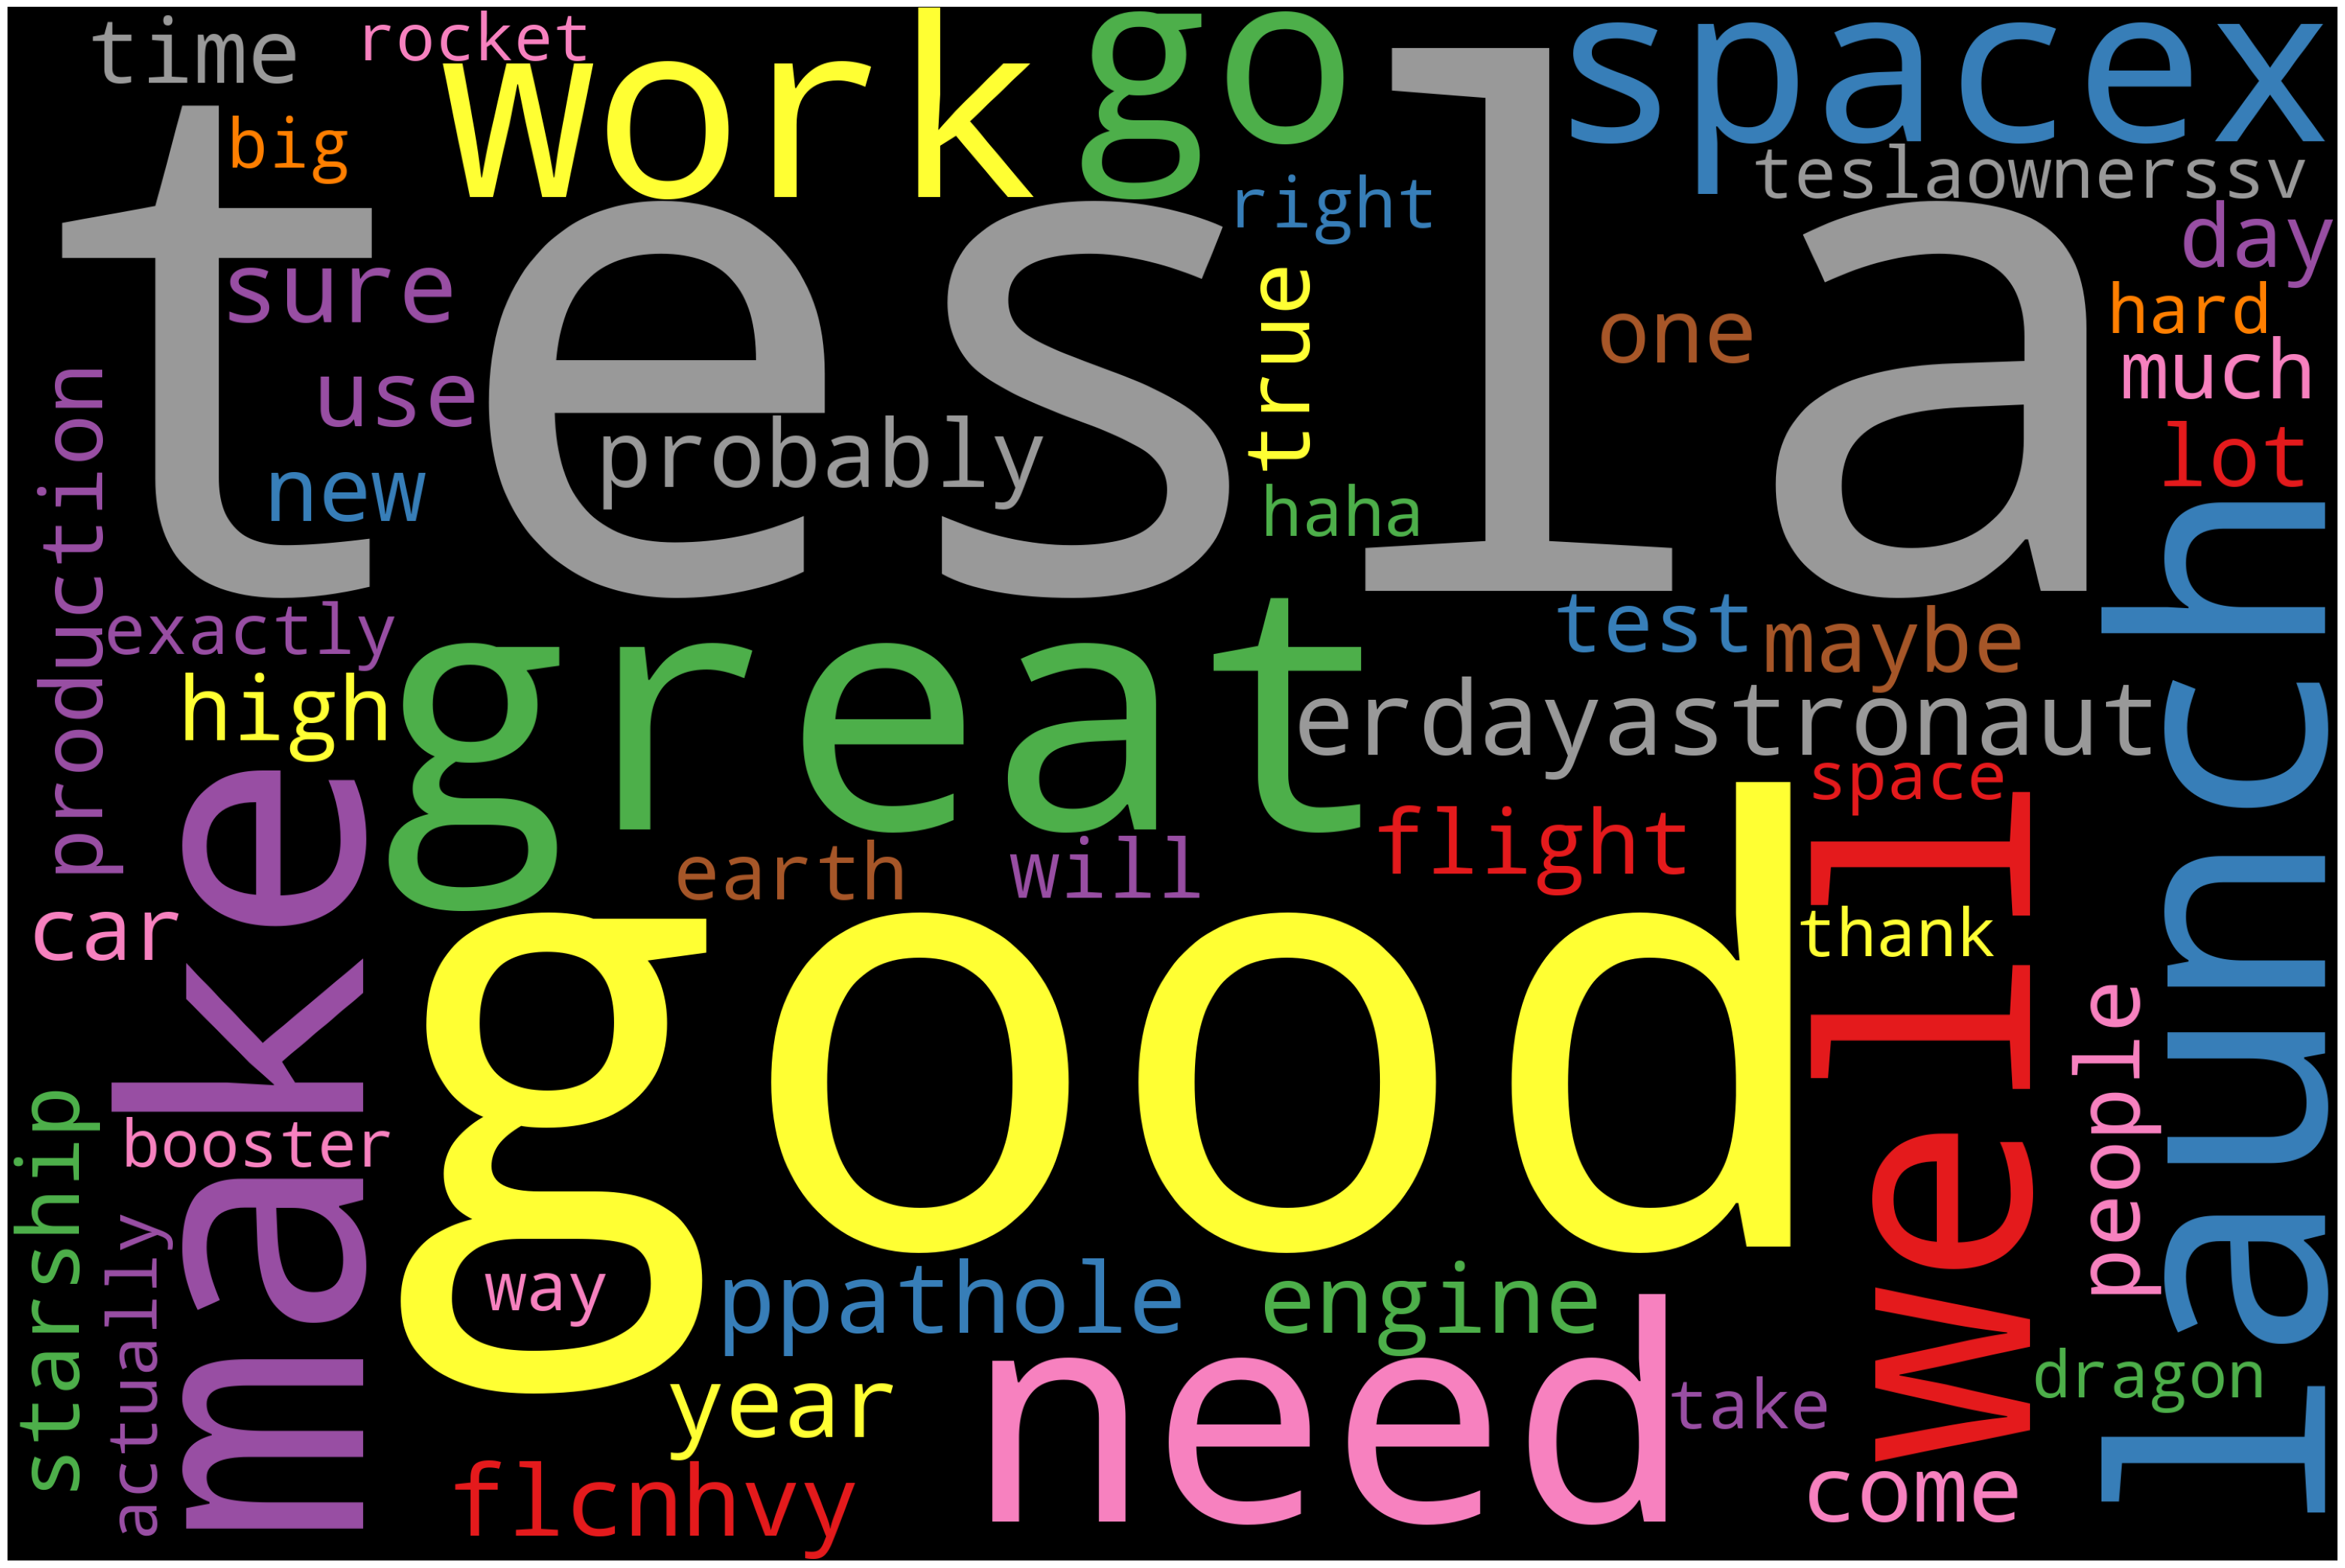

In [ ]:
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_data)
plot_cloud(wordcloud)

In [ ]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_data
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

launch NOUN
first ADJ
two NUM
element NOUN
lunar ADJ
gateway NOUN
together ADV
one NUM
mission NOUN
httpstco3pwtajtourville PROPN
blkmdl3 NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
rationaletienne PROPN
starlink PROPN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
httpstco9z8ac6skqxrationaletienne PROPN
spacex VERB
need VERB
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
httpstco7j1c92hdjlidaacarmack PROPN
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g ADV
httpstcoxmyi7qwsgwadamklotz NOUN
it PRON
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mars PROPN
cryptoshrikar PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m NOUN
carbon NOUN
capture NOUN
prize NOUN
httpstcofsw5ianl0rsruhle PROPN
eve

**Emotion Mining - Sentiment Analysis**

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(data))

In [ ]:
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [ ]:
# Emotion Lexicon -

df=pd.read_csv('/content/positive-words.txt',sep=',',encoding='Latin-1')
df

,a+
0,abound
1,abounds
2,abundance
3,abundant
4,accessable
...,...
2000,youthful
2001,zeal
2002,zenith
2003,zest


In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['compound'] = df['a+'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['positive'] = df['a+'].apply(lambda x: sid.polarity_scores(x)['pos'])
df['negative'] = df['a+'].apply(lambda x: sid.polarity_scores(x)['neg'])
df['neutral'] = df['a+'].apply(lambda x: sid.polarity_scores(x)['neu'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df

,a+,compound,positive,negative,neutral
0,abound,0.0000,0.0,0.0,1.0
1,abounds,0.0000,0.0,0.0,1.0
2,abundance,0.0000,0.0,0.0,1.0
3,abundant,0.0000,0.0,0.0,1.0
4,accessable,0.0000,0.0,0.0,1.0
...,...,...,...,...,...
2000,youthful,0.3182,1.0,0.0,0.0
2001,zeal,0.0000,0.0,0.0,1.0
2002,zenith,0.0000,0.0,0.0,1.0
2003,zest,0.0000,0.0,0.0,1.0
